<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Parcial_2__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 2 - Señales y Sistemas 2023 - 2**

## **Pregunta 2.1 :**

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t  +\pi/4)|^2$, con $t\in [-\pi, \pi]$.  Presente las simulaciones respectivas para graficar el espectro y la reconstrucción de la señal en función del número de armónicos y el error relativo.

#**Solución teórica**

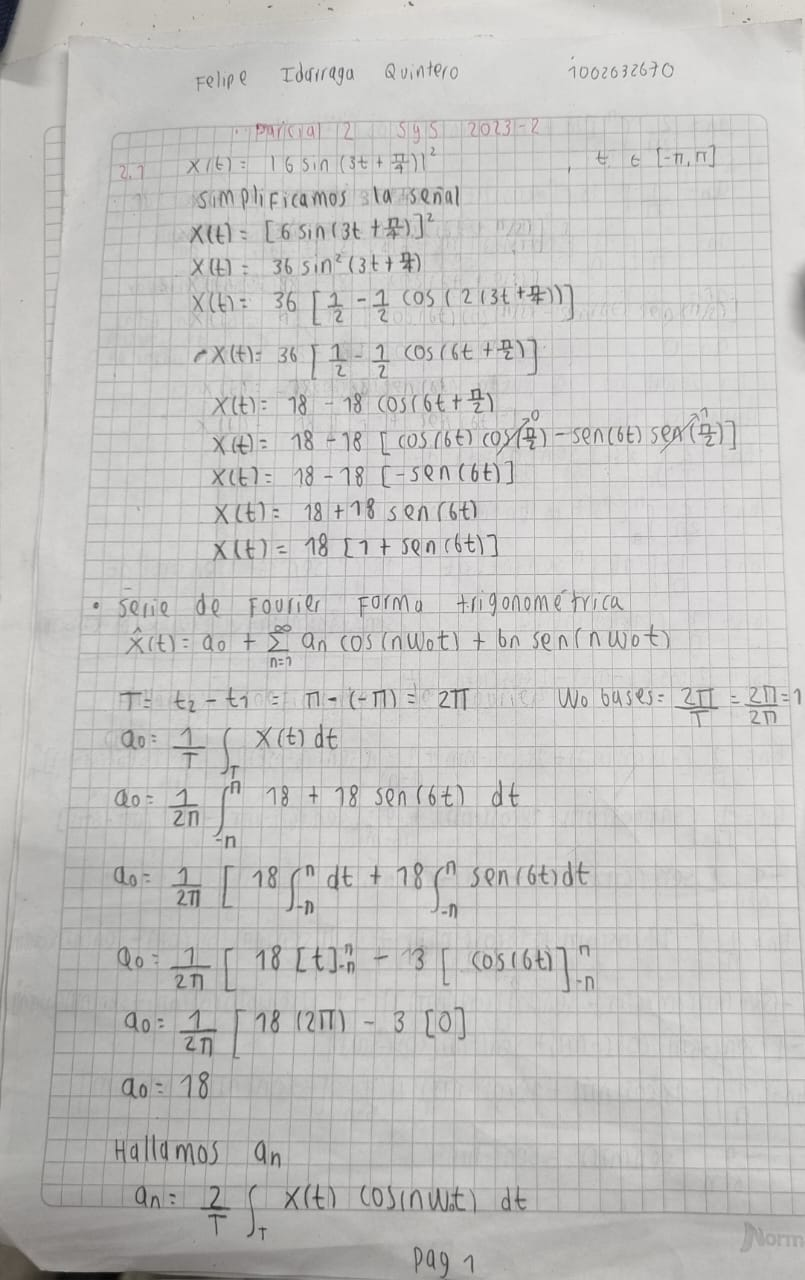

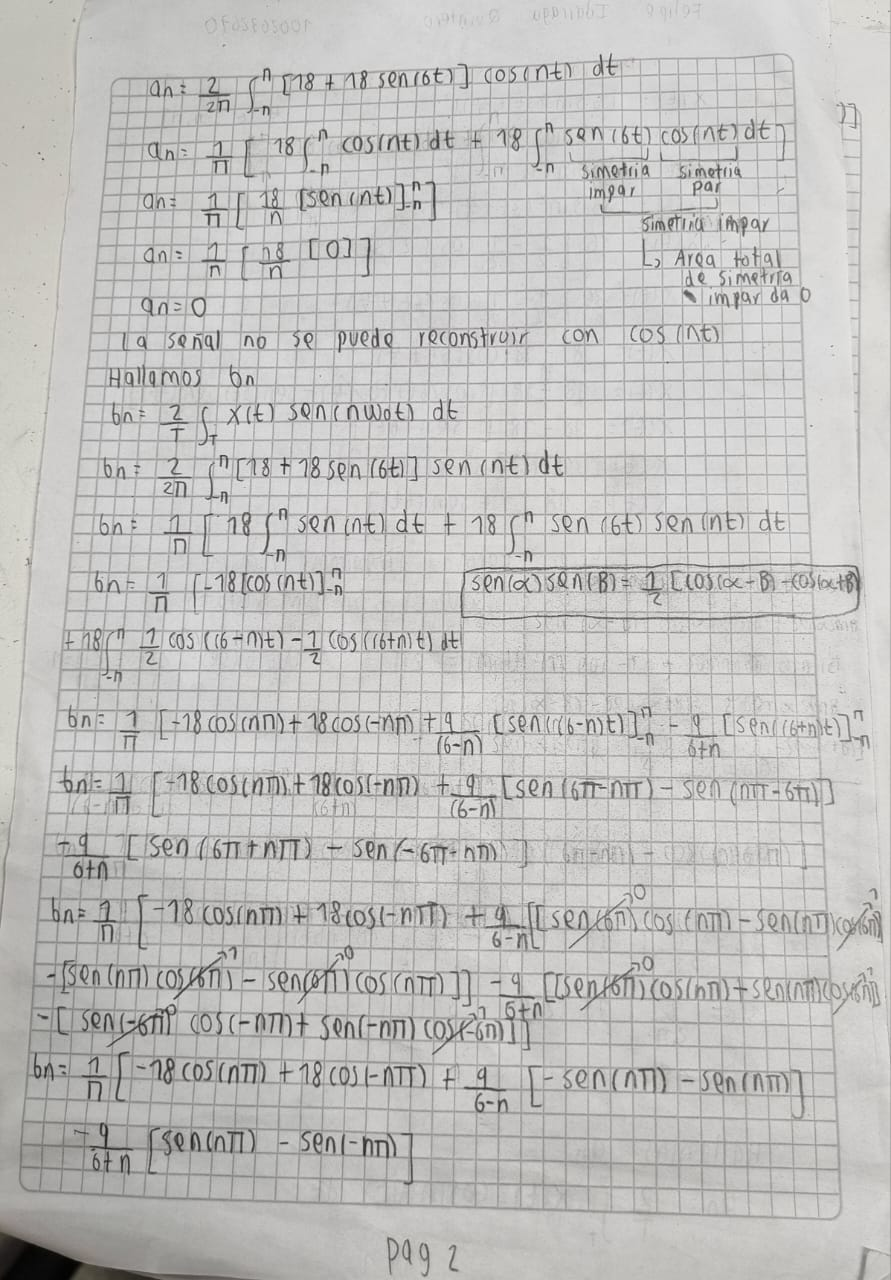

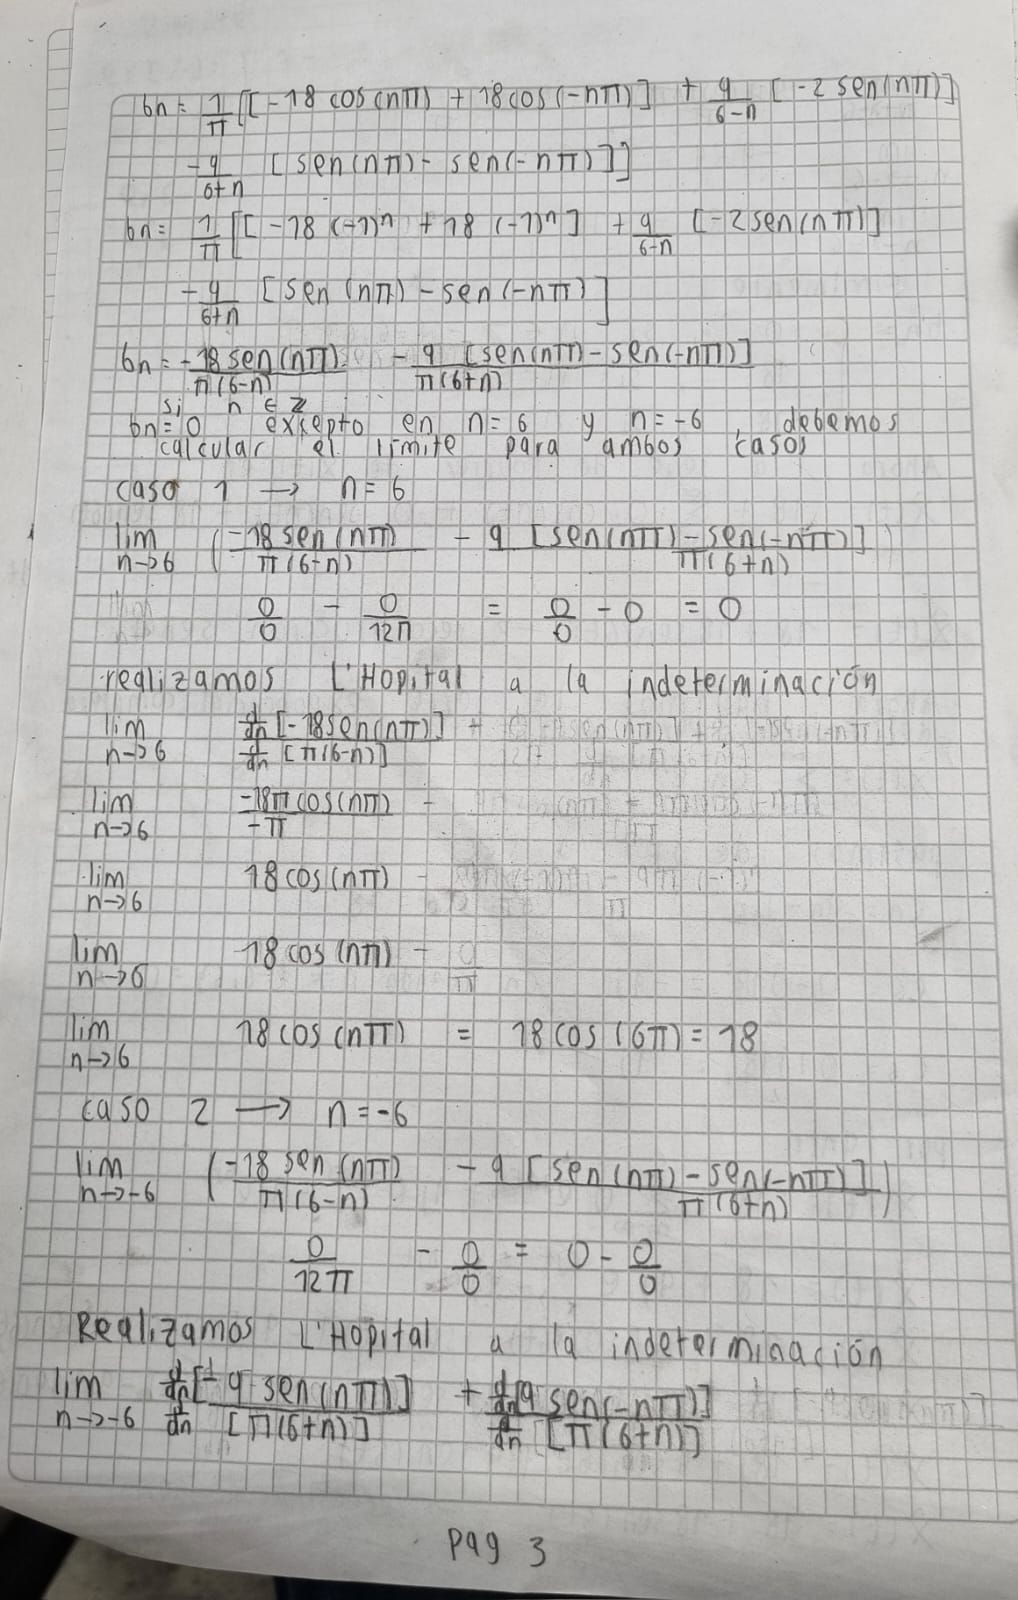

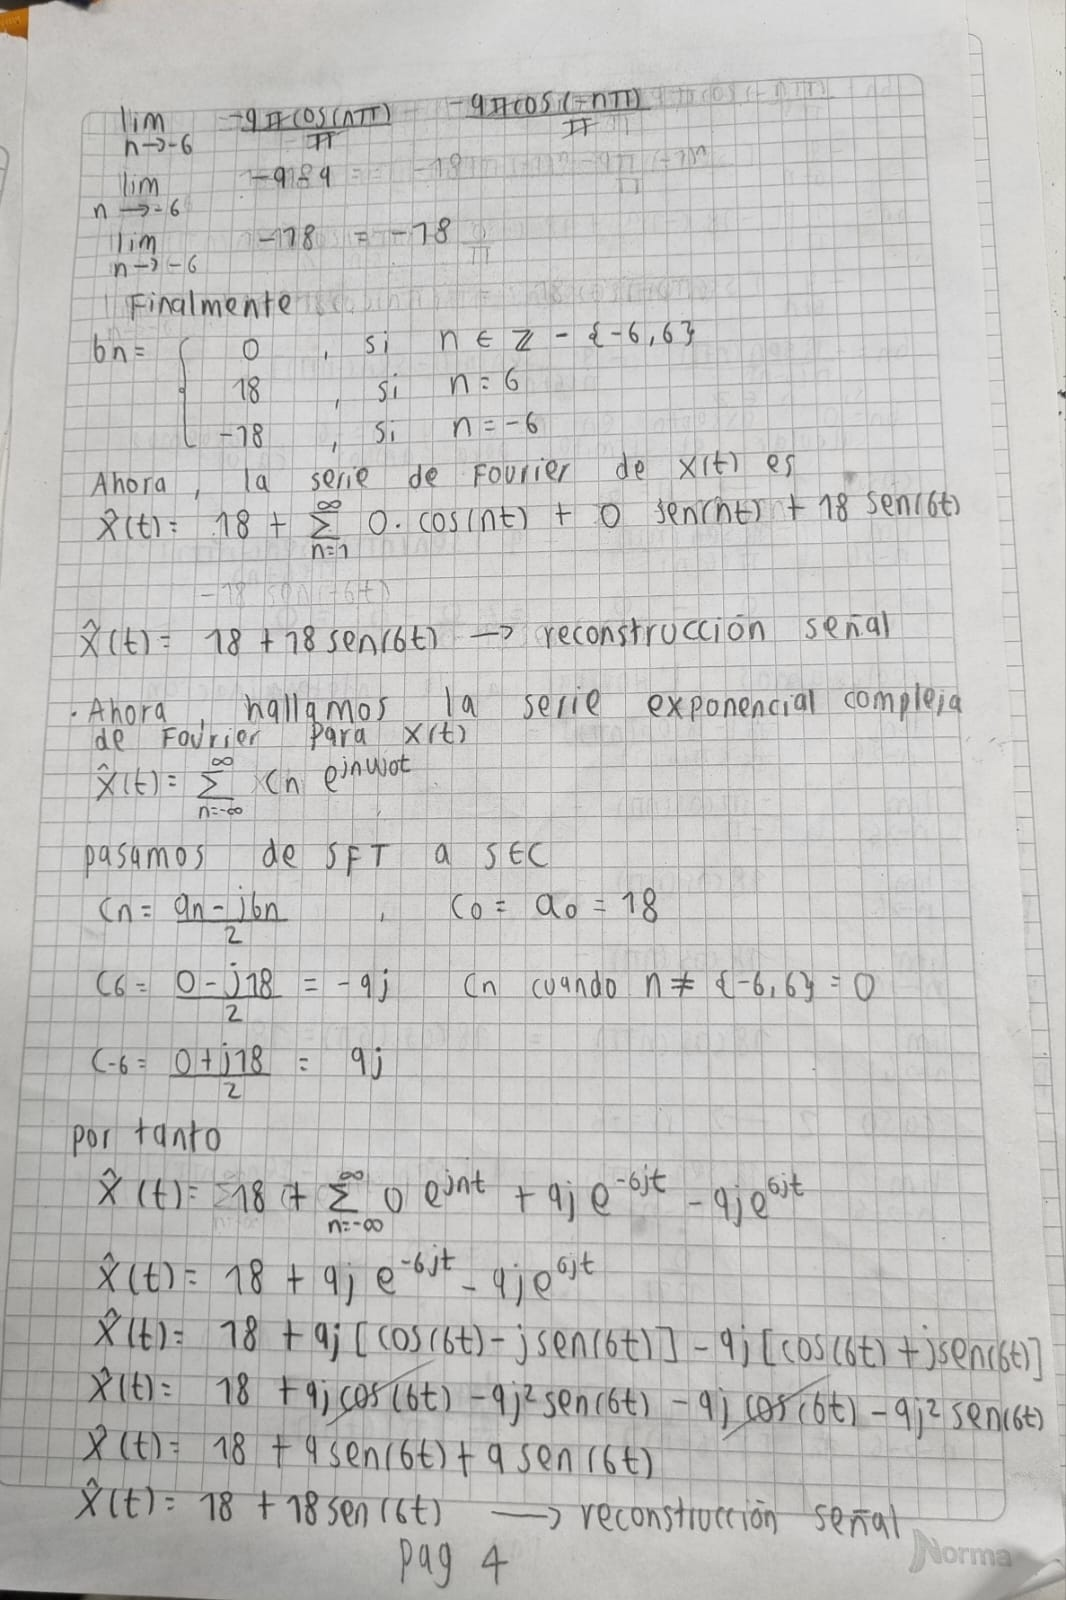

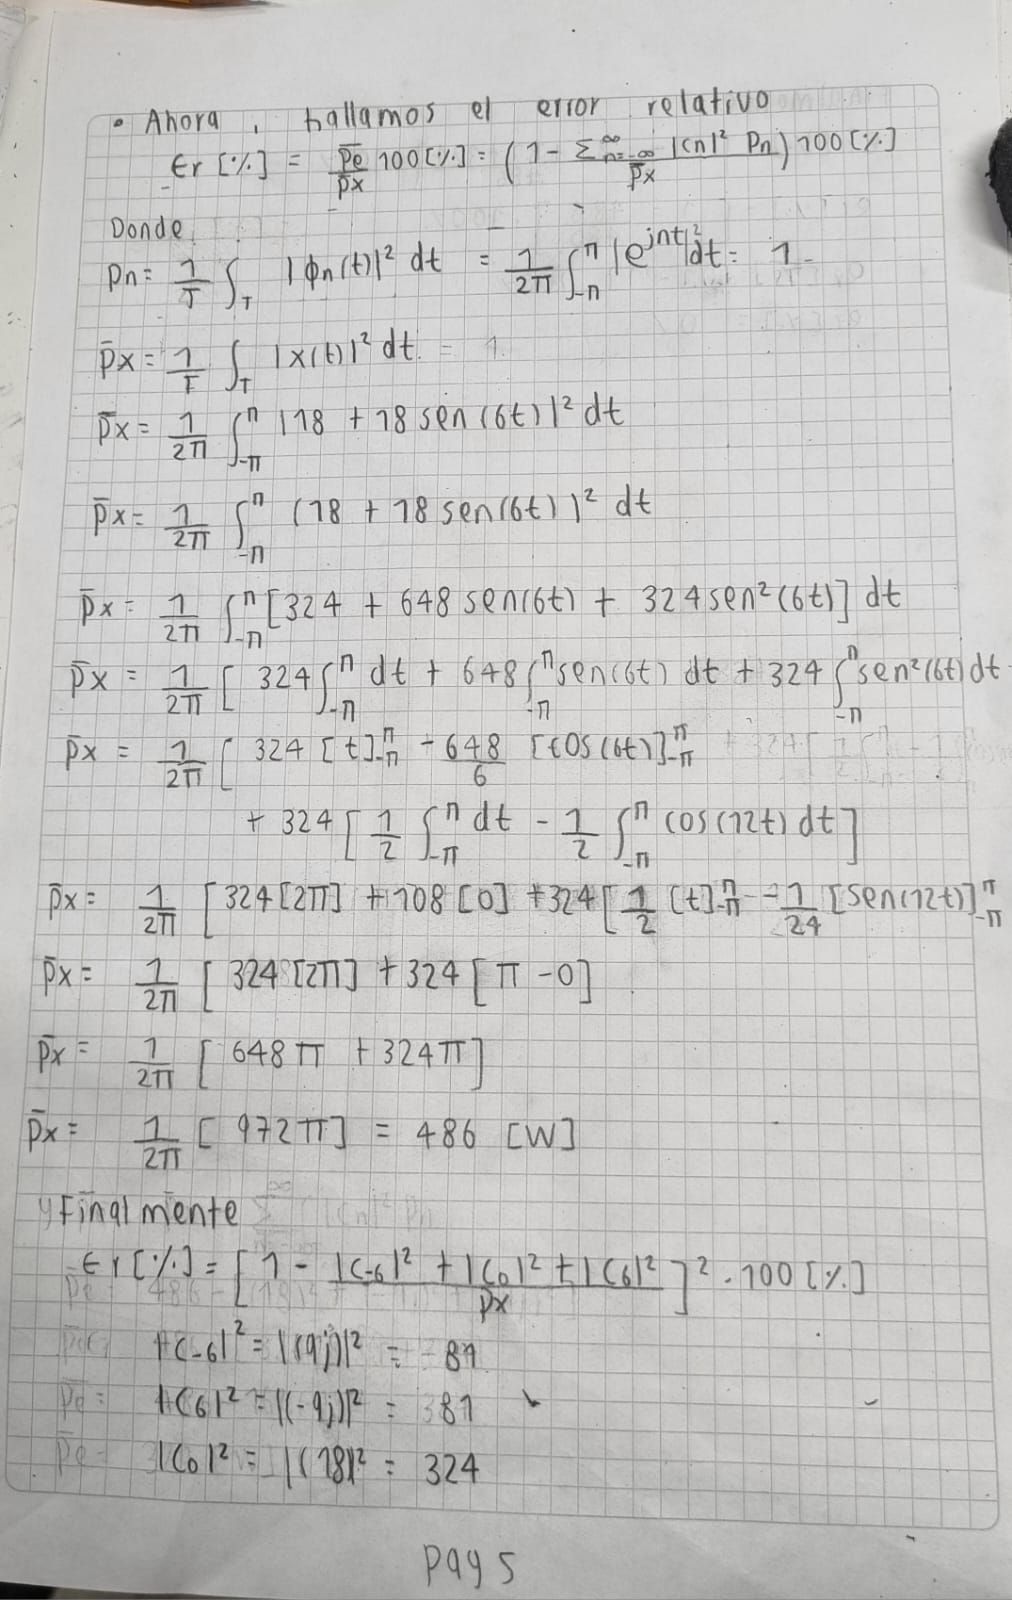

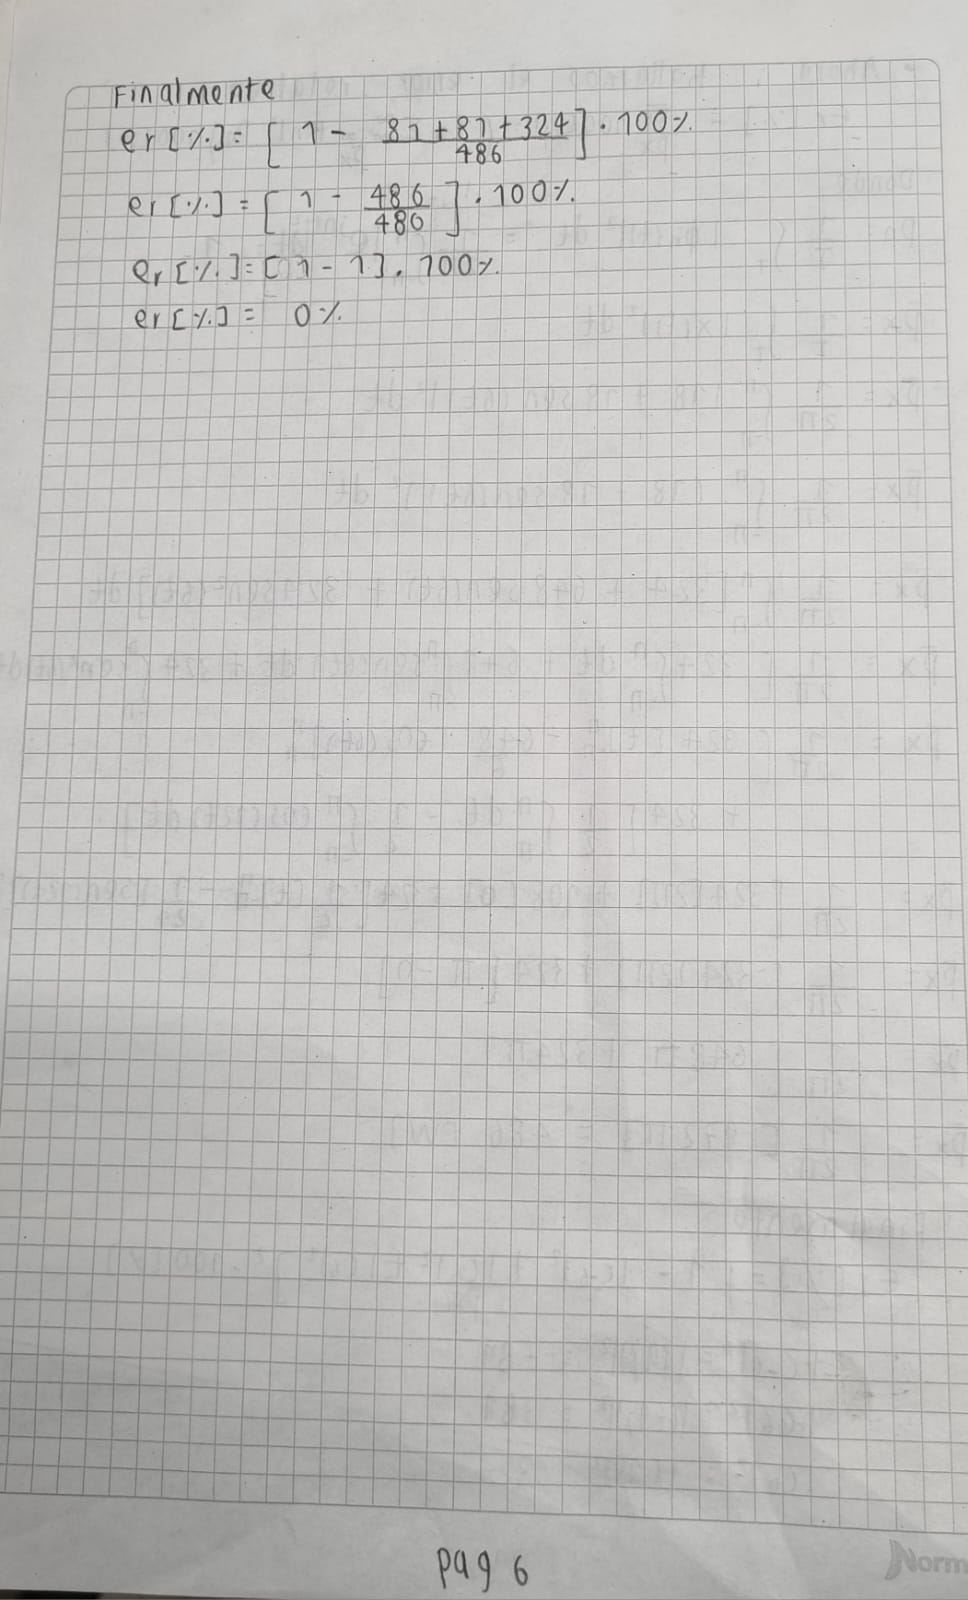

#**Simulaciones**

#**1. Señal**

wo= 1.0
Fo= 1.5707963267948966


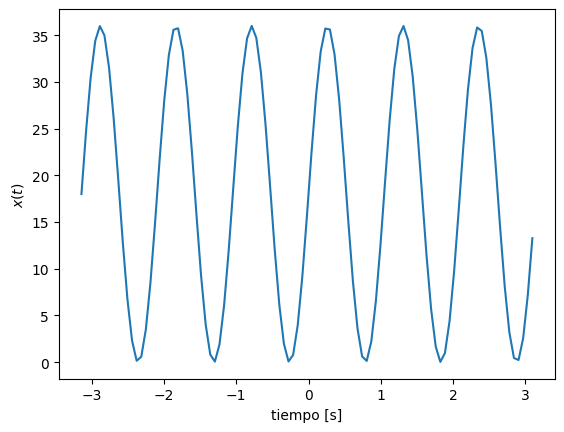

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
Nm = len(tv) # Numero de muestras requeridas

x = abs(6*np.sin((3*tv)+(np.pi/4)))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

#**2. Bases**

In [3]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 10 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [4]:
phin.shape #tamaño matriz phin

(99, 21)

#**3. Espectro**

In [5]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9*1j #armónico -6
cn[N+6] = -9*1j #armónico +6

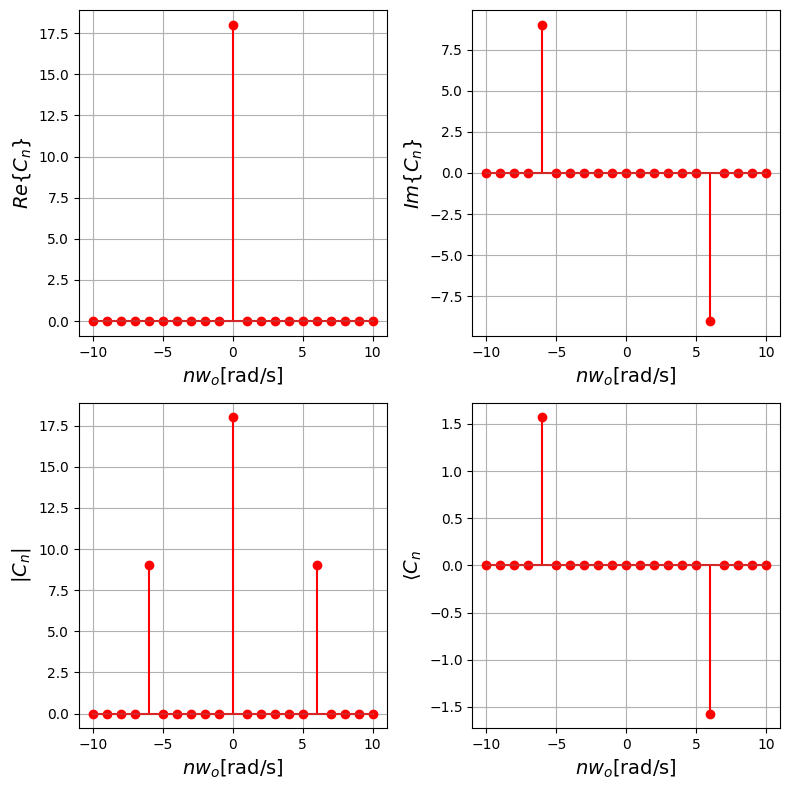

In [6]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

#**4. Reconstrucción**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


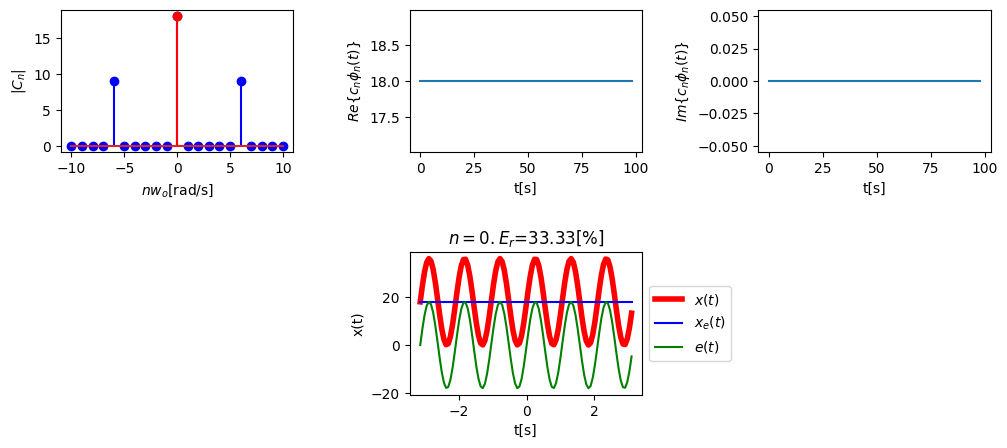

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = 486
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe

    ax[1,1].plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim


## Pregunta 2.2 :

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

#**Solución teórica**

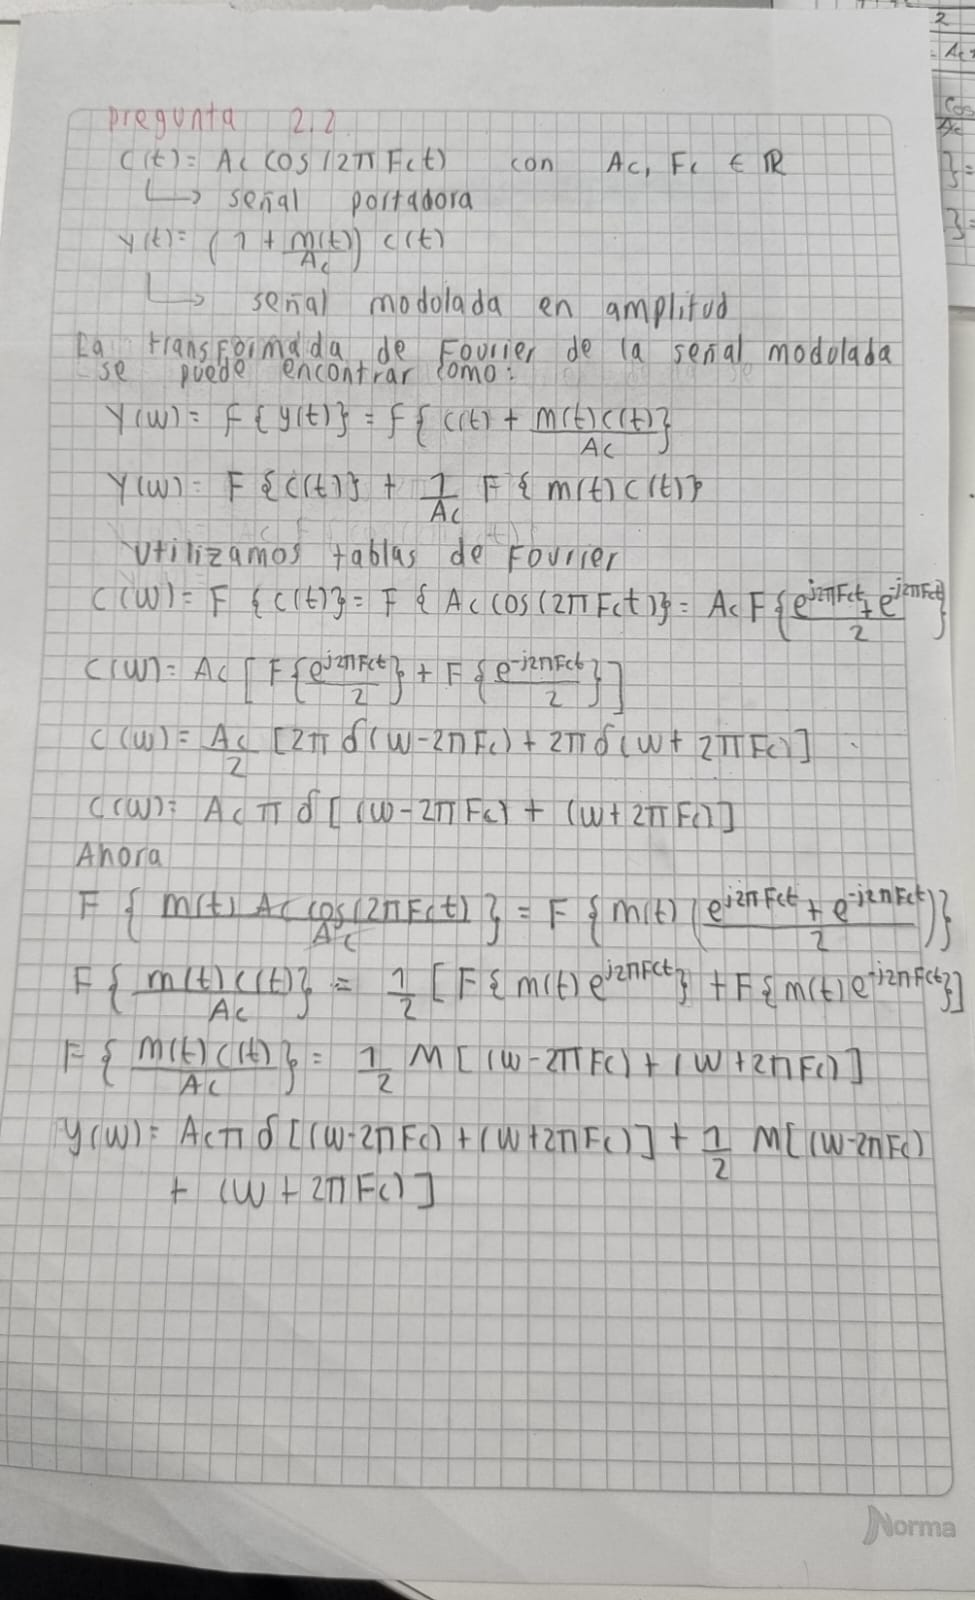

#**Simulaciones**

# Descargar mp3 videos youtube

---

In [12]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.4-py3-none-a

In [42]:
import os #usar funcionalidades dependientes del sistema operativo
import yt_dlp as youtube_dl
#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

## **link canción y nombre salida mp3**

In [43]:
link_= ['https://www.youtube.com/watch?v=O2lC_oBI7DU']
name_ = ['Feid']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Feid
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading android player API JSON
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading android player API JSON
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[info] O2lC_oBI7DU: Downloading 1 format(s): 251
[download] Feid.mp3 has already been downloaded
[download] 100% of    2.81MiB
Download complete... Feid.mp3


# **Convertir mp3 a wav**

In [44]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

#**Leer wav en numpy**

In [45]:
!pip install soundfile

In [46]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Feid.wav


In [55]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [56]:
#reproducir fragmento original #señal mensaje
Audio(m,rate=fs)

#**Simulaciones**

#**Señal portadora y señal mensaje**

In [57]:
Fc = 15000 #frecuencia de portadora
ts = 5 #t segmento
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = np.max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora

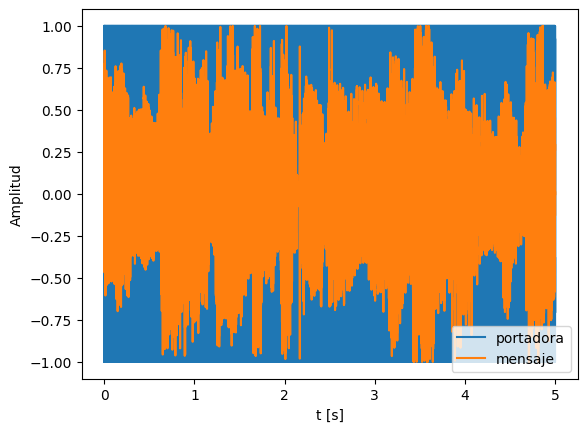

In [58]:
#Grafica señal portadora y señal mensaje en el tiempo
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

#**Señal modulada en AM**

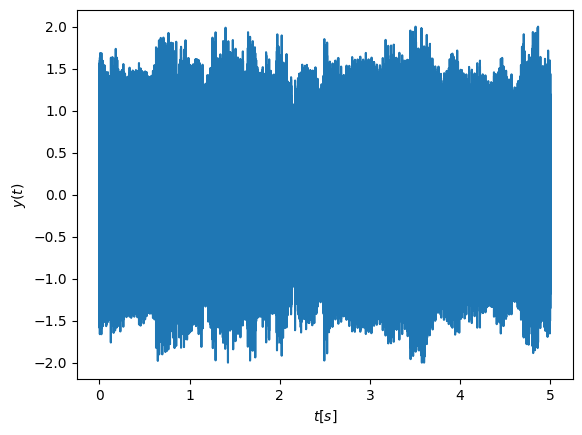

In [59]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

In [60]:
Audio(y,rate=fs) #reproducir modulada

#**Señales en el dominio de la frecuencia**

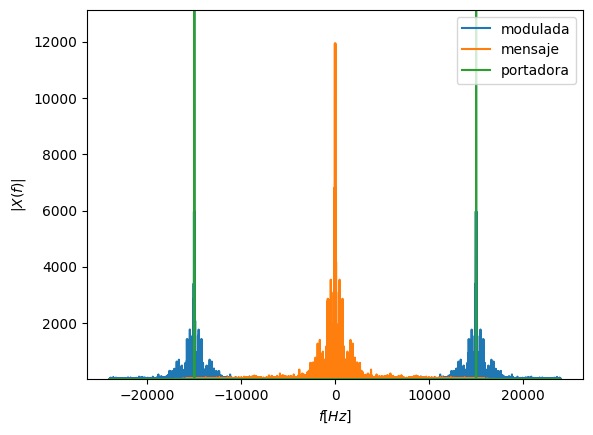

In [61]:
#calculo de espectros
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([np.min(abs(Xfm)), 1.1*np.max(abs(Xfm))])
plt.show()

## **Pregunta 2.3 :**

# Case Western Reserve Experiments


Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de apoyo). Determine las predicciones de fallos para el arreglo Xtest.

In [88]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-06 04:42:31--  https://docs.google.com/uc?export=download&confirm=&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 64.233.188.100, 64.233.188.101, 64.233.188.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn&followup=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn [following]
--2023-11-06 04:42:31--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn&followup=https://docs.google.com/uc?export%3Ddownload%26confirm%26id%3D1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving accounts.google.com (accounts.google.c

In [79]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

FileNotFoundError: ignored

In [78]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]:', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos
labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases
print("Clases: ",labels_)

NameError: ignored

In [77]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

NameError: ignored

In [76]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

NameError: ignored

In [75]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape


NameError: ignored

In [74]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()


NameError: ignored

In [73]:
np.unique(Ytrain)

NameError: ignored

NameError: ignored

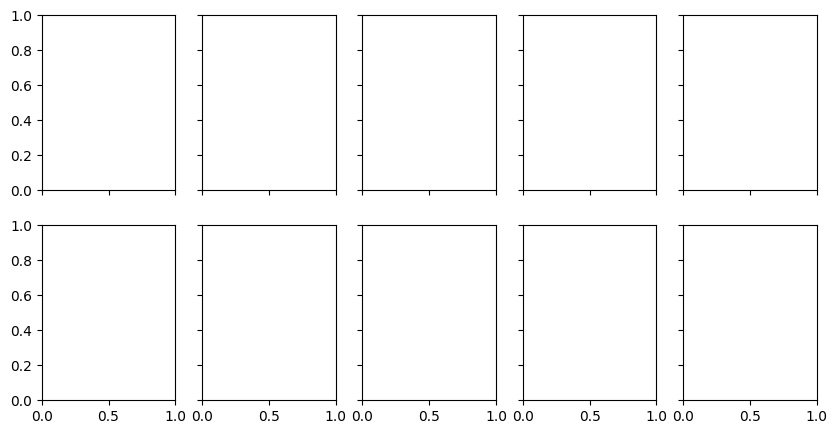

In [83]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

In [82]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()


NameError: ignored

In [84]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

NameError: ignored

In [85]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

NameError: ignored

In [86]:
Ytest_e = Ytrain[ind_]

NameError: ignored

In [87]:
from sklearn.metrics import accuracy_score

print(f"ACC={accuracy_score(Ytest,Ytest_e)}")


NameError: ignored